# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [123]:
airbnb_df = pd.read_csv("airbnb_hw.csv")

#clean column: remove '$' and ','
airbnb_df["Price"] = airbnb_df["Price"].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)

#count missing values
missing_prices = airbnb_df["Price"].isna().sum()
print(f"Missing values in Price column: {missing_prices}")

#summary
print(airbnb_df["Price"].describe())
airbnb_df.head()

Missing values in Price column: 0
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


In [124]:
police_df = pd.read_csv("mn_police_use_of_force.csv")
police_df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [125]:
#check values in subject_injury
print(police_df["subject_injury"].value_counts(dropna=False))
print(f"Missing values: {police_df['subject_injury'].isna().sum()} / {len(police_df)} ({police_df['subject_injury'].isna().mean() * 100:.2f}%)")

#standardize yes/no and replace missing values
police_df["subject_injury"] = police_df["subject_injury"].str.strip().str.lower()
police_df["subject_injury"] = police_df["subject_injury"].replace({"yes": "Yes", "no": "No"})

#fill missing values with "No"
police_df["subject_injury"] = police_df["subject_injury"].fillna("No")

#check
print(police_df["subject_injury"].value_counts())

#cross-tabulation of subject_injury and force_type
force_injury_ct = pd.crosstab(police_df["subject_injury"], police_df["force_type"], margins=True)
print(force_injury_ct)

NaN    9848
Yes    1631
No     1446
Name: subject_injury, dtype: int64
Missing values: 9848 / 12925 (76.19%)
No     11294
Yes     1631
Name: subject_injury, dtype: int64
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          8144               1552        2   
Yes                 2          1286                 41        0   
All                 4          9430               1593        2   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             60                108           87   
Yes                            44                 40            0   
All                           104                148           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No    

In [126]:
#to preface, i was very confused by this question. my apolgies if this is not the correct data!
df = pd.read_csv("pretrial_data.csv")
df.head()

#clean 'released' column ????
df['released'] = df['released'].replace({1: "Yes", 0: "No", 9: np.nan})

#convert variable
df['released_dummy'] = df['released'].map({"Yes": 1, "No": 0})
print(df['released_dummy'].value_counts(dropna=False))


/var/folders/n3/tf063q4n2r7cw46hsnd_2fc80000gn/T/ipykernel_13439/1515228762.py:2: DtypeWarning: Columns (2,5,6,8,80,81,82,83,84,85,109,164,165,166,167,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,271,272,273,274,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,302,303,304,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,3

1.0    19154
0.0     3801
NaN       31
Name: released_dummy, dtype: int64


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [127]:
import matplotlib.pyplot as plt
sharks_df = pd.read_csv("sharks.csv")
sharks_df.head()


/var/folders/n3/tf063q4n2r7cw46hsnd_2fc80000gn/T/ipykernel_13439/3550242.py:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks_df = pd.read_csv("sharks.csv")


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# rename 'Unnamed: 9' to 'Gender'
sharks_df = sharks_df.rename(columns={'Unnamed: 9': 'Gender'})

# Drop NaN in 'Gender'
sharks_df = sharks_df.dropna(subset=['Gender'])

# Drop NaN columns
sharks_df = sharks_df.dropna(axis=1, how='all')

# Drop empty columns
sharks_df = sharks_df.dropna(axis=1, how='all')
sharks_df = sharks_df.loc[:, ~sharks_df.columns.str.contains('Unnamed')]

# Drop duplicates
sharks_df = sharks_df.drop(columns=['Case Number.1', 'Case Number.2', 'original order'], errors='ignore')
sharks_df = sharks_df.drop(columns=['pdf', 'href formula', 'href'], errors='ignore')


sharks_df.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com"
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF"
5,5,2020.01.12,12-Jan-2020,2020.0,Unprovoked,THAILAND,Phang Nga Province,Nang Thong Beach,Swimming,Hans-Peter Malten,M,75,Calf bitten,N,07h15,NaN,"K. McMurray, TrackingSharks.com"


In [130]:
#year is originally float values; convert 'Year' to integers
sharks_df['Year'] = pd.to_numeric(sharks_df['Year'], errors='coerce').astype('Int64')

#years from 1940
sharks_df = sharks_df[(sharks_df['Year'] >= 1940) & (sharks_df['Year'] <= 2025)]
#its only giving me values from 2017 onwards, unclear why

# Verify the result
print(sharks_df['Year'].describe())


count      28.000000
mean     2019.250000
std         0.645497
min      2017.000000
25%      2019.000000
50%      2019.000000
75%      2020.000000
max      2020.000000
Name: Year, dtype: float64


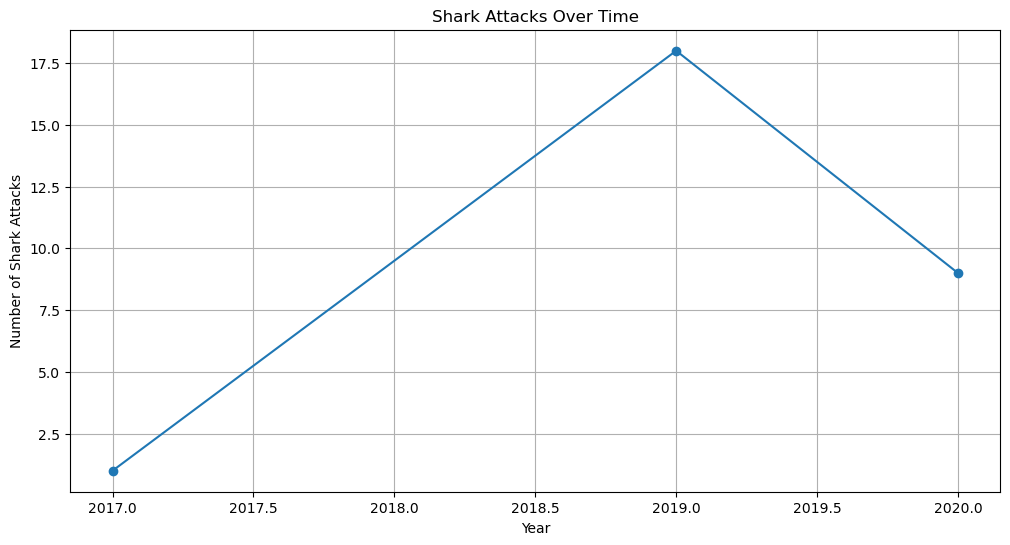

In [132]:
#count
yearly_counts = sharks_df['Year'].value_counts().sort_index()

#plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks Over Time')
plt.grid(True)
plt.show()

#shark attacks are increasing and recently dropping--possible COVID

Age range: 7 to 75


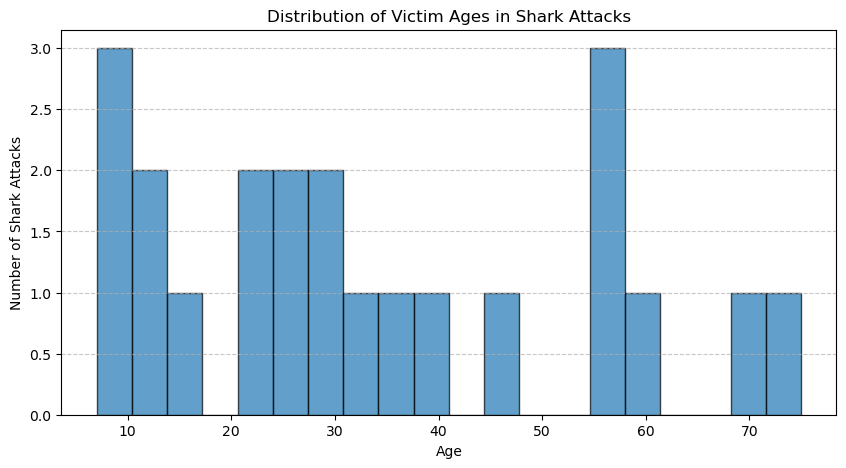

In [133]:
#age to numeric
sharks_df['Age'] = pd.to_numeric(sharks_df['Age'], errors='coerce')

#drop missing values
sharks_df = sharks_df.dropna(subset=['Age'])

#convert to integers 
sharks_df['Age'] = sharks_df['Age'].astype(int)

#check range
print(f"Age range: {sharks_df['Age'].min()} to {sharks_df['Age'].max()}")

#plot ages
plt.figure(figsize=(10, 5))
plt.hist(sharks_df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Shark Attacks')
plt.title('Distribution of Victim Ages in Shark Attacks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [134]:
# Print updated gender distribution
print(f"Gender distribution after cleaning:\n{sharks_df['Gender'].value_counts()}")

Gender distribution after cleaning:
M    18
F     4
Name: Gender, dtype: int64


In [135]:
#standardizing 'Type' values
valid_types = ['Provoked', 'Unprovoked']

#convert other values to 'Unknown'
sharks_df['Type'] = sharks_df['Type'].apply(lambda x: x if x in valid_types else 'Unknown')
print("Attack Type Distribution:\n", sharks_df['Type'].value_counts())

#total attacks
total_attacks = len(sharks_df)

#count each attack
unprovoked_attacks = (sharks_df['Type'] == 'Unprovoked').sum()
unknown_attacks = (sharks_df['Type'] == 'Unknown').sum()

#proportion 
unprovoked_proportion = unprovoked_attacks / total_attacks
unknown_proportion = unknown_attacks / total_attacks
print(f"Proportion of Unprovoked Attacks: {unprovoked_proportion:.2%}")
print(f"Proportion of Unknown Attacks: {unknown_proportion:.2%}")


Attack Type Distribution:
 Unprovoked    17
Unknown        3
Provoked       2
Name: Type, dtype: int64
Proportion of Unprovoked Attacks: 77.27%
Proportion of Unknown Attacks: 13.64%


In [136]:
valid_fatal_values = ['Y', 'N']

#keep 'Y' and 'N', replace anything else
sharks_df['Fatal (Y/N)'] = sharks_df['Fatal (Y/N)'].apply(lambda x: x if x in valid_fatal_values else 'Unknown')
print("Fatality Distribution:\n", sharks_df['Fatal (Y/N)'].value_counts())


Fatality Distribution:
 N          17
Y           3
Unknown     2
Name: Fatal (Y/N), dtype: int64


In [137]:
gender_unprovoked_counts = sharks_df[sharks_df['Type'] == 'Unprovoked']['Gender'].value_counts(normalize=True)
print("Proportion of unprovoked attacks by gender:\n", gender_unprovoked_counts)


Proportion of unprovoked attacks by gender:
 M    0.823529
F    0.176471
Name: Gender, dtype: float64


In [139]:
#count fatal cases
fatal_by_type = sharks_df.groupby('Type')['Fatal (Y/N)'].value_counts(normalize=True).unstack()
print("Fatality rate by attack type:\n", fatal_by_type)


Fatality rate by attack type:
 Fatal (Y/N)         N   Unknown         Y
Type                                     
Provoked     1.000000       NaN       NaN
Unknown           NaN  0.666667  0.333333
Unprovoked   0.882353       NaN  0.117647


In [140]:
#count fatal cases for gender
fatal_by_gender = sharks_df.groupby('Gender')['Fatal (Y/N)'].value_counts(normalize=True).unstack()
print("Fatality rate by gender:\n", fatal_by_gender)


Fatality rate by gender:
 Fatal (Y/N)         N   Unknown         Y
Gender                                   
F            1.000000       NaN       NaN
M            0.722222  0.111111  0.166667


In [141]:
#clean 'Species' column
sharks_df['Species '] = sharks_df['Species '].str.strip().str.lower()
print(sharks_df['Species '].unique())

#white shark filter
white_sharks = sharks_df[sharks_df['Species '].str.contains('white shark', na=False)]

#proportion
white_shark_proportion = len(white_sharks) / len(sharks_df)
print(f"Proportion of attacks by white sharks: {white_shark_proportion:.2%}")


[nan '"a small shark"' 'broadnose seven gill shark?' 'lemon shark'
 'white shark' '3.4 m tiger shark' "10'-12' tiger shark"
 'juvenile blacktip shark' "5' blacktip shark" "4' to 5' blacktip shark"]
Proportion of attacks by white sharks: 4.55%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

In [142]:
#This paper explains how to tidy data and steps to achieve a tidy dataset
#Having a standard makes it easier to clean datasets: it is not subjective but rather an objective method to clean data without making mistakes or having to draw up new code
#The first sentence means that tidy datasets all follow a similar 'standard', but are all unique in how they must be organized/read. In the second sentence, she is referring to how sometimes the columns can be understandable, but drawing conclusions can be difficult. 
#Values: numbers or strings. Variables: contains all values relating to the same measure. Observations: all the values relating to one 'unit'.
#The standard of how data is organized in a dataset. 
#Column headers are values and not variables. Multiple variables in one column. Variables in both rows and columns. Multiple observation units on one table. One observational unit across many tables. Table 4 is messy because there are too many variables in one table. Melting a dataset means stacking it.
#Table 11 is messy because there are a lot of unnamed column names with no data. Table 12 is molten--data is stacked.
#Wickham is saying that tidy data and tidy tools form a loop--in order to have tidy data, you must have tidy tools and vice versa. She hopes that in the future there will be more of a response to develop universal tools to better understand and clean data. 

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?